In [31]:
import os
import numpy as np
os.chdir('/import/home2/yhchenmath/Code/ucs/')
# No warning
import warnings
import tifffile
import h5py
from skimage.segmentation import find_boundaries
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from downstream.utils import read_json_to_namespace

config = read_json_to_namespace("./downstream/config/vizgen_mouse_brain.json")

In [32]:
mask_dict = {}
for method in config.segmentation_results.keys():
    if os.path.exists(config.segmentation_results[method]):
        mask_dict[method] = tifffile.imread(config.segmentation_results[method])
    else:
        print(f"{method} mask not found")
        mask_dict[method] = None
boundary_dict = {}
for method in mask_dict.keys():
    if mask_dict[method] is not None:
        boundary_dict[method] = find_boundaries(mask_dict[method], mode='inner')
    else:
        boundary_dict[method] = None

dapi = tifffile.imread(config.dapi)

gene_map = tifffile.imread(config.gene_map)
gene_map_sum = np.sum(gene_map, axis=2)

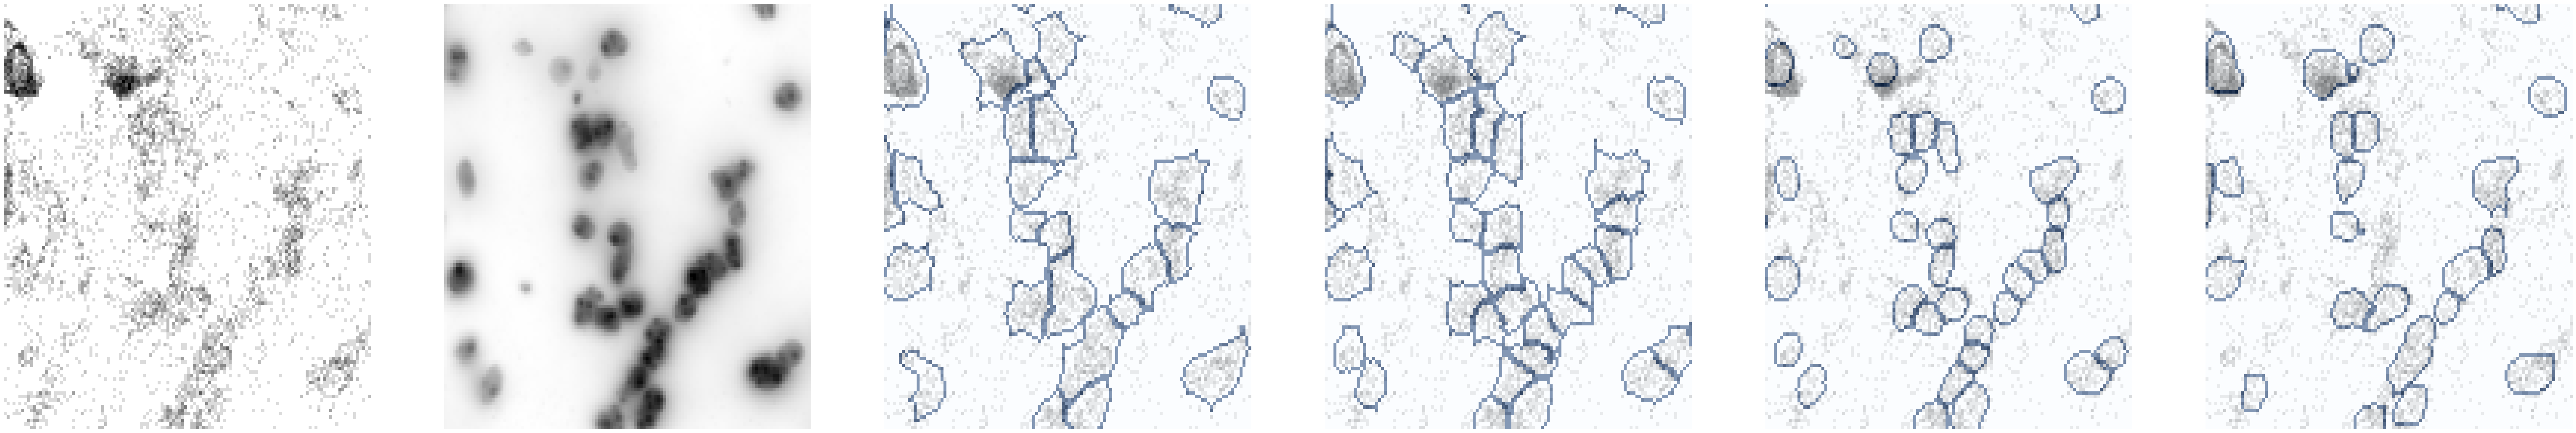

In [33]:
import matplotlib.pyplot as plt
y_min, y_max, x_min, x_max = 6821, 6945, 4803, 4926
fig, ax = plt.subplots(1, 2 + len(mask_dict.keys()), figsize=(15 * (2 + len(mask_dict.keys())), 15))
ax[0].imshow(np.log1p(gene_map_sum[x_min:x_max, y_min:y_max]), aspect='auto', cmap='Greys')
# ax[0].set_title('Gene Map')
# All axis off
for a in ax:
    a.axis('off')
# ax[1].imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
# ax[1].set_title('HE')
ax[1].imshow(dapi[x_min:x_max, y_min:y_max], aspect='auto', cmap='binary')
# ax[1].set_title('DAPI')

for i, method in enumerate(boundary_dict.keys()):
    # ax[2 + i].set_title(method)
    ax[2 + i].imshow(np.log1p(gene_map_sum[x_min:x_max, y_min:y_max]), aspect='auto', cmap='Greys')
    # ax[2 + i].imshow(dapi[x_min:x_max, y_min:y_max], aspect='auto', cmap='binary')
    ax[2 + i].imshow(boundary_dict[method][x_min:x_max, y_min:y_max], aspect='auto', cmap='Blues', alpha=0.5)
    # ax[2 + i].set_title(method)